In [1]:
import pandas as pd 
import numpy as np 
train=pd.read_csv('cs-training.csv',index_col=False)


In [2]:
print(train.shape)
train.head()

(150000, 11)


,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [3]:
min(train.age)

0

In [3]:
print(train.SeriousDlqin2yrs.value_counts())
train_x=train.drop('SeriousDlqin2yrs',axis=1)
train_y=train['SeriousDlqin2yrs']

0    139974
1     10026
Name: SeriousDlqin2yrs, dtype: int64


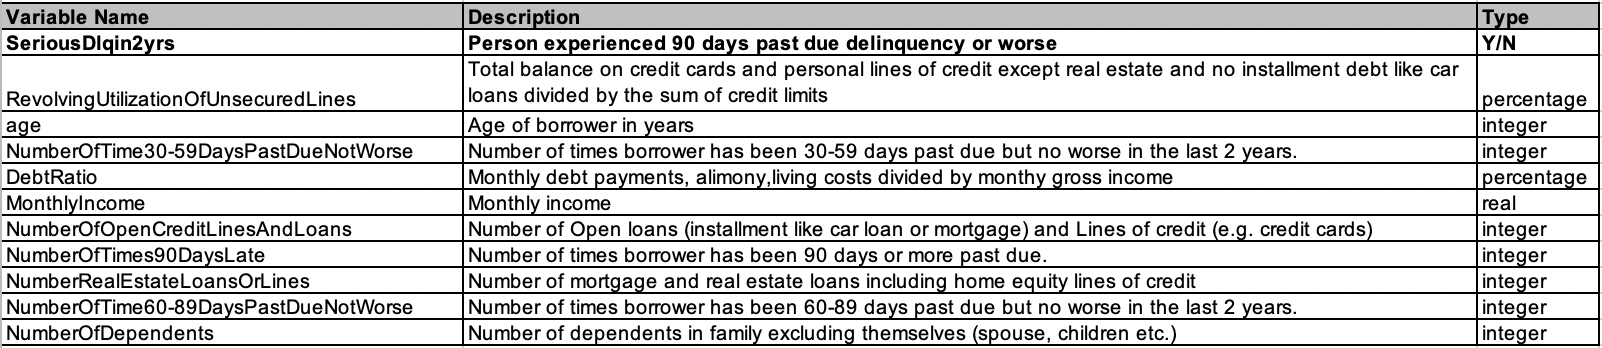

In [4]:
from sklearn.impute import SimpleImputer
from sklearn.ensemble import ExtraTreesRegressor
imp=SimpleImputer(strategy='mean')
x_ceshi=imp.fit_transform(train_x)
model=ExtraTreesRegressor(n_jobs=-1,n_estimators=200,max_depth=20,max_features=0.5,random_state=0)
model.fit(x_ceshi,train_y)
features=train_x.columns.values
importances=model.feature_importances_
importance_std=np.std([tree.feature_importances_ for tree in model.estimators_],axis=0)
fea_df=pd.DataFrame({'features':features,'importances':importances,'imp_std':importance_std})
fea_df.sort_values('importances',ascending=False)

,features,importances,imp_std
6,NumberOfTimes90DaysLate,0.259485,0.065676
2,NumberOfTime30-59DaysPastDueNotWorse,0.161892,0.046521
8,NumberOfTime60-89DaysPastDueNotWorse,0.133327,0.053729
1,age,0.086053,0.009649
0,RevolvingUtilizationOfUnsecuredLines,0.085803,0.011637
5,NumberOfOpenCreditLinesAndLoans,0.065024,0.008335
3,DebtRatio,0.062880,0.009549
4,MonthlyIncome,0.061541,0.007884
9,NumberOfDependents,0.042801,0.006183
7,NumberRealEstateLoansOrLines,0.041193,0.005474


In [5]:
## fix RevolvingUtilizationOfUnsecuredLines
q1,q3=train_x['RevolvingUtilizationOfUnsecuredLines'].quantile([0.25,0.75])
lower = q1 - 3*(q3-q1)
upper = q3 + 3*(q3-q1)
train_x.loc[(train_x['RevolvingUtilizationOfUnsecuredLines']>=upper)|(train_x['RevolvingUtilizationOfUnsecuredLines']<=lower),'RevolvingUtilizationOfUnsecuredLines']=np.nan 
train_x.loc[(train_x['RevolvingUtilizationOfUnsecuredLines']>=1),'RevolvingUtilizationOfUnsecuredLines']=np.nan 
### fix age
train_x.loc[(train_x['age']==0),'age']=np.nan 
## fix NumberOfTime30-59DaysPastDueNotWorse
train_x.loc[(train_x['NumberOfTime30-59DaysPastDueNotWorse']>90),'NumberOfTime30-59DaysPastDueNotWorse']=np.nan 
## fix DebtRatio
q1,q3=train_x['DebtRatio'].quantile([0.25,0.75])
lower = q1 - 3*(q3-q1)
upper = q3 + 3*(q3-q1)
train_x.loc[(train_x['DebtRatio']>=upper)|(train_x['DebtRatio']<=lower),'DebtRatio']=np.nan 
## fix MonthlyIncome
q1,q3=train_x['MonthlyIncome'].quantile([0.25,0.75])
lower = q1 - 3*(q3-q1)
upper = q3 + 3*(q3-q1)
train_x.loc[(train_x['MonthlyIncome']>=upper)|(train_x['MonthlyIncome']<=lower),'MonthlyIncome']=np.nan 
## fix NumberOfTimes90DaysLate and NumberOfTime60-89DaysPastDueNotWorse
train_x.loc[(train_x['NumberOfTimes90DaysLate']>90),'NumberOfTimes90DaysLate']=np.nan 
train_x.loc[(train_x['NumberOfTime60-89DaysPastDueNotWorse']>90),'NumberOfTime60-89DaysPastDueNotWorse']=np.nan 

In [6]:
columns=list(train_x.columns)

from sklearn.impute import SimpleImputer
imp=SimpleImputer(strategy='mean')
train_x=imp.fit_transform(train_x)

train_x=pd.DataFrame(train_x,columns=columns)
train_x.head()
train_x.to_csv('./train_x.csv')

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0.766127,45.0,2.0,0.802982,9120.000000,13.0,0.0,6.0,0.0,2.0
1,0.957151,40.0,0.0,0.121876,2600.000000,4.0,0.0,0.0,0.0,1.0
2,0.658180,38.0,1.0,0.085113,3042.000000,2.0,1.0,0.0,0.0,0.0
3,0.233810,30.0,0.0,0.036050,3300.000000,5.0,0.0,0.0,0.0,0.0
4,0.907239,49.0,1.0,0.024926,6107.322992,7.0,0.0,1.0,0.0,0.0


In [7]:
from sklearn.preprocessing import StandardScaler
std_=StandardScaler()
train_ceshi=std_.fit_transform(train_x)
train_ceshi=pd.DataFrame(train_ceshi,columns=columns)
model=ExtraTreesRegressor(n_jobs=-1,n_estimators=200,max_depth=20,max_features=0.5,random_state=0)
model.fit(train_ceshi,train_y)
features=train_x.columns.values
importances=model.feature_importances_
importance_std=np.std([tree.feature_importances_ for tree in model.estimators_],axis=0)
fea_df=pd.DataFrame({'features':features,'importances':importances,'imp_std':importance_std})
fea_df.sort_values('importances',ascending=False)

,features,importances,imp_std
6,NumberOfTimes90DaysLate,0.174949,0.047771
0,RevolvingUtilizationOfUnsecuredLines,0.166410,0.028720
2,NumberOfTime30-59DaysPastDueNotWorse,0.114690,0.030056
8,NumberOfTime60-89DaysPastDueNotWorse,0.096215,0.031850
1,age,0.093325,0.006932
3,DebtRatio,0.084934,0.006384
4,MonthlyIncome,0.081664,0.005967
5,NumberOfOpenCreditLinesAndLoans,0.079216,0.005556
9,NumberOfDependents,0.056328,0.004371
7,NumberRealEstateLoansOrLines,0.052270,0.003301


In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
lg=LogisticRegression(random_state=42,solver='newton-cg')
best_clf=GridSearchCV(lg,param_grid={'C':[0.001,0.01,0.1,1]},
                      n_jobs=-1,scoring='roc_auc')
best_clf.fit(train_ceshi,train_y)
print(best_clf.best_params_,best_clf.best_score_)
pd.DataFrame(best_clf.cv_results_)

{'C': 0.001} 0.846869799792124


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.332560,0.034361,0.025104,0.004335,0.001,{'C': 0.001},0.845763,0.844085,0.846664,0.844962,0.852875,0.846870,0.003122,1
1,1.108687,0.283827,0.020166,0.002034,0.01,{'C': 0.01},0.844589,0.843139,0.845592,0.844100,0.851804,0.845845,0.003083,2
2,0.795421,0.029997,0.015491,0.002327,0.1,{'C': 0.1},0.844426,0.843008,0.845445,0.843972,0.851658,0.845702,0.003080,3
3,0.675860,0.242532,0.011709,0.001691,1,{'C': 1},0.844410,0.842995,0.845427,0.843959,0.851644,0.845687,0.003080,4


In [9]:
from sklearn.ensemble import RandomForestClassifier
rd=RandomForestClassifier(random_state=42,n_jobs=-1)
rd_clf=GridSearchCV(rd,param_grid={'n_estimators':[50,100,200,300]},n_jobs=-1,scoring='roc_auc')
rd_clf.fit(train_ceshi,train_y)
print(rd_clf.best_params_,rd_clf.best_score_)

KeyboardInterrupt: 

In [ ]:
rd=RandomForestClassifier(random_state=42,n_jobs=-1,n_estimators=300)
rd.fit(x_ceshi,train_y)
fea_imp=pd.DataFrame({'features':columns,'Feature_importance':rd.feature_importances_})
fea_imp.sort_values('Feature_importance',ascending=False)

将随机森林和extratree比较，可以发现其中的feature importance不一样，下面将feature engineering并得出最重要的20个featre

In [ ]:
from lightgbm.sklearn import LGBMClassifier
clf = LGBMClassifier(random_state = 50, n_jobs = -1)
best_clf = GridSearchCV(clf,scoring='roc_auc',cv=5,n_jobs=-1,
                        param_grid={'n_estimators': [50,100,200],
                        'reg_lambda':[0.5,1,1.5]})
best_clf.fit(x_ceshi,train_y)
print("Select best LGB model with n_estimators = {} and reg_lambda={} with best_score={}".format(
    best_clf.best_params_['n_estimators'],best_clf.best_params_['reg_lambda'],
    best_clf.best_score_))

In [10]:
poly_set=train_x[['RevolvingUtilizationOfUnsecuredLines','DebtRatio','MonthlyIncome','age']]
last_set=train_x.drop(['RevolvingUtilizationOfUnsecuredLines','DebtRatio','MonthlyIncome','age'],axis=1)
from sklearn.preprocessing import PolynomialFeatures
poly_tr=PolynomialFeatures(degree=3)
po_set=poly_tr.fit_transform(poly_set)
poly_handle_set=pd.DataFrame(po_set,columns=poly_tr.get_feature_names(['RevolvingUtilizationOfUnsecuredLines','DebtRatio','MonthlyIncome','age']))
poly_handle_set.head()

,1,RevolvingUtilizationOfUnsecuredLines,DebtRatio,MonthlyIncome,age,RevolvingUtilizationOfUnsecuredLines^2,RevolvingUtilizationOfUnsecuredLines DebtRatio,RevolvingUtilizationOfUnsecuredLines MonthlyIncome,RevolvingUtilizationOfUnsecuredLines age,DebtRatio^2,...,DebtRatio^3,DebtRatio^2 MonthlyIncome,DebtRatio^2 age,DebtRatio MonthlyIncome^2,DebtRatio MonthlyIncome age,DebtRatio age^2,MonthlyIncome^3,MonthlyIncome^2 age,MonthlyIncome age^2,age^3
0,1.0,0.766127,0.802982,9120.000000,45.0,0.586950,0.615186,6987.074674,34.475697,0.644780,...,0.517747,5880.396331,29.015113,6.678756e+07,329543.865742,1626.038811,7.585505e+11,3.742848e+09,1.846800e+07,91125.0
1,1.0,0.957151,0.121876,2600.000000,40.0,0.916138,0.116654,2488.592649,38.286041,0.014854,...,0.001810,38.619902,0.594152,8.238831e+05,12675.124904,195.001922,1.757600e+10,2.704000e+08,4.160000e+06,64000.0
2,1.0,0.658180,0.085113,3042.000000,38.0,0.433201,0.056020,2002.183986,25.010845,0.007244,...,0.000617,22.037120,0.275283,7.876191e+05,9838.765697,122.903714,2.814995e+10,3.516430e+08,4.392648e+06,54872.0
3,1.0,0.233810,0.036050,3300.000000,30.0,0.054667,0.008429,771.572261,7.014293,0.001300,...,0.000047,4.288613,0.038987,3.925810e+05,3568.918518,32.444714,3.593700e+10,3.267000e+08,2.970000e+06,27000.0
4,1.0,0.907239,0.024926,6107.322992,49.0,0.823083,0.022614,5540.804047,44.454731,0.000621,...,0.000015,3.794420,0.030443,9.297133e+05,7459.234238,59.846594,2.277994e+11,1.827670e+09,1.466368e+07,117649.0


In [11]:
poly_tr.get_feature_names(['RevolvingUtilizationOfUnsecuredLines','DebtRatio','MonthlyIncome','age'])

['1',
 'RevolvingUtilizationOfUnsecuredLines',
 'DebtRatio',
 'MonthlyIncome',
 'age',
 'RevolvingUtilizationOfUnsecuredLines^2',
 'RevolvingUtilizationOfUnsecuredLines DebtRatio',
 'RevolvingUtilizationOfUnsecuredLines MonthlyIncome',
 'RevolvingUtilizationOfUnsecuredLines age',
 'DebtRatio^2',
 'DebtRatio MonthlyIncome',
 'DebtRatio age',
 'MonthlyIncome^2',
 'MonthlyIncome age',
 'age^2',
 'RevolvingUtilizationOfUnsecuredLines^3',
 'RevolvingUtilizationOfUnsecuredLines^2 DebtRatio',
 'RevolvingUtilizationOfUnsecuredLines^2 MonthlyIncome',
 'RevolvingUtilizationOfUnsecuredLines^2 age',
 'RevolvingUtilizationOfUnsecuredLines DebtRatio^2',
 'RevolvingUtilizationOfUnsecuredLines DebtRatio MonthlyIncome',
 'RevolvingUtilizationOfUnsecuredLines DebtRatio age',
 'RevolvingUtilizationOfUnsecuredLines MonthlyIncome^2',
 'RevolvingUtilizationOfUnsecuredLines MonthlyIncome age',
 'RevolvingUtilizationOfUnsecuredLines age^2',
 'DebtRatio^3',
 'DebtRatio^2 MonthlyIncome',
 'DebtRatio^2 age',
 'D

In [ ]:
poly_new=pd.concat([last_set,poly_handle_set],axis=1)
poly_new.head()

In [ ]:
std_=StandardScaler()
train_data=std_.fit_transform(poly_new)
rd=RandomForestClassifier(random_state=42,n_jobs=-1,n_estimators=300)
rd.fit(train_data,train_y)
columns=list(poly_new)
fea_imp=pd.DataFrame({'features':columns,'Feature_importance':rd.feature_importances_})
fea_imp=fea_imp.sort_values('Feature_importance',ascending=False).reset_index(drop=True)
fea_imp.head(20)

In [ ]:
poly_new['target']=train_y.values
poly_new.to_csv('poly_new.csv',index=False)